In [57]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt

In [58]:
def iris_type(s):
    it = {b'Iris-setosa': 0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
    return it[s]

In [59]:
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'

In [60]:
def show_accuracy(a,b,tip):
    acc=a.ravel()==b.ravel()
    print(tip,' accuracy :',100*float(np.mean(acc)))

In [61]:
path=r'F:\study\ml\DoctorZou\08RegressionII\8.iris.data'
data=np.loadtxt(path,dtype=np.float,delimiter=',',converters={4:iris_type})

In [62]:
x, y = np.split(data, (4, ), axis=1)
x = x[:, :2]
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state=0,
                                                    test_size=0.4)

In [63]:
clf=svm.SVC(C=0.8,kernel='rbf',gamma=20,decision_function_shape='ovo')
clf.fit(x_train,y_train.ravel())
clf.score(x_train,y_train)

0.91111111111111109

In [64]:
y_hat=clf.predict(x_train)
show_accuracy(y_hat,y_train,'train data:')

train data:  accuracy : 91.11111111111111


In [65]:
y_hat=clf.predict(x_test)
show_accuracy(y_hat,y_test,'test data:')

test data:  accuracy : 70.0


In [34]:
x1_min,x1_max=x[:,0].min(),x[:,0].max()
x2_min,x2_max=x[:,1].min(),x[:,1].max()
x1,x2=np.mgrid[x1_min:x1_max:500j,x2_min:x2_max:500j]
grid_test=np.stack((x1.flat,x2.flat),axis=1)
Z=clf.decision_function(grid_test)
Z

array([[ 0.06376979, -0.04609334, -0.21127064],
       [ 0.06726907, -0.04259218, -0.2112687 ],
       [ 0.07091291, -0.03894633, -0.21126664],
       ..., 
       [ 0.00437458, -0.10635176, -0.21203512],
       [ 0.00437458, -0.10626128, -0.21195535],
       [ 0.00437458, -0.10617992, -0.21188364]])

In [36]:
grid_hat=clf.predict(grid_test)
grid_hat=grid_hat.reshape(x1.shape)

In [37]:
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

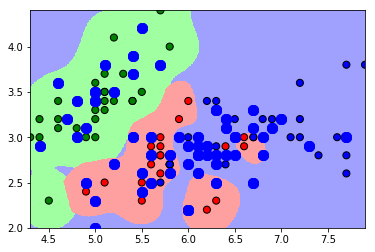

In [67]:
plt.pcolormesh(x1,x2,grid_hat,cmap=cm_light)
plt.scatter(x[:,0],x[:,1],c=y.ravel(),edgecolors='k',s=50,cmap=cm_dark)
plt.scatter(x_test[:,0],x_test[:,1],s=100,facecolors='b',zorder=10)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.show()